In [1]:
## Machine Learning Online Class - Exercise 4 Neural Network Learning

#  Instructions
#  ------------
# 
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions 
#  in this exericse:
#
#     sigmoidGradient.m
#     randInitializeWeights.m
#     nnCostFunction.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#
import sys
sys.path.append('../ex3/')
import numpy as np
import scipy.io
from scipy.optimize import minimize
#from sigmoid import sigmoid
from displayData import displayData
from predict import predict # ex3
from nnCostFunction import nnCostFunction
from sigmoidGradient import sigmoidGradient
from randInitializeWeights import randInitializeWeights
from checkNNGradients import checkNNGradients

## Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10   
                          # (note that we have mapped "0" to label 10)


Loading and Visualizing Data ...


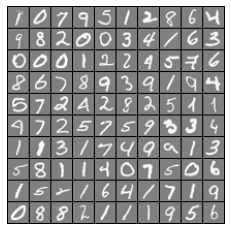

In [2]:
%matplotlib inline
## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset. 
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print ('Loading and Visualizing Data ...')

data = scipy.io.loadmat('ex4data1.mat')
X = data['X']
y = data['y']
m, _ = X.shape

# Randomly select 100 data points to display
rand_indices = np.random.permutation(range(m))
sel = X[rand_indices[0:100], :]

displayData(sel)


In [3]:
## ================ Part 2: Loading Parameters ================
# In this part of the exercise, we load some pre-initialized 
# neural network parameters.

print ('Loading Saved Neural Network Parameters ...')

# Load the weights into variables Theta1 and Theta2
data = scipy.io.loadmat('ex4weights.mat')
Theta1 = data['Theta1']
Theta2 = data['Theta2']
y = np.squeeze(y)

# Unroll parameters 
nn_params = np.hstack((Theta1.T.ravel(), Theta2.T.ravel()))

Loading Saved Neural Network Parameters ...


In [4]:
## ================ Part 3: Compute Cost (Feedforward) ================
#  To the neural network, you should first start by implementing the
#  feedforward part of the neural network that returns the cost only. You
#  should complete the code in nnCostFunction.m to return cost. After
#  implementing the feedforward to compute the cost, you can verify that
#  your implementation is correct by verifying that you get the same cost
#  as us for the fixed debugging parameters.
#
#  We suggest implementing the feedforward cost *without* regularization
#  first so that it will be easier for you to debug. Later, in part 4, you
#  will get to implement the regularized cost.
#
print ('Feedforward Using Neural Network ...')

# Weight regularization parameter (we set this to 0 here).
Lambda = 0

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
    num_labels, X, y, Lambda)

print ('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.287629)\n' % J)

Feedforward Using Neural Network ...
Cost at parameters (loaded from ex4weights): 0.287629 
(this value should be about 0.287629)



In [5]:
## =============== Part 4: Implement Regularization ===============
#  Once your cost function implementation is correct, you should now
#  continue to implement the regularization with the cost.
#

print ('Checking Cost Function (w/ Regularization) ...')

# Weight regularization parameter (we set this to 1 here).
Lambda = 1

J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

print ('Cost at parameters (loaded from ex4weights): %f \n(this value should be about 0.383770)' % J)



Checking Cost Function (w/ Regularization) ...
Cost at parameters (loaded from ex4weights): 0.383770 
(this value should be about 0.383770)


In [6]:
## ================ Part 5: Sigmoid Gradient  ================
#  Before you start implementing the neural network, you will first
#  implement the gradient for the sigmoid function. You should complete the
#  code in the sigmoidGradient.m file.
#

print ('Evaluating sigmoid gradient...')

g = sigmoidGradient(np.array([1, -0.5, 0, 0.5, 1]))
print ('Sigmoid gradient evaluated at [1 -0.5 0 0.5 1]: ')
print (g)

Evaluating sigmoid gradient...
Sigmoid gradient evaluated at [1 -0.5 0 0.5 1]: 
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [16]:
## ================ Part 6: Initializing Pameters ================
#  In this part of the exercise, you will be starting to implment a two
#  layer neural network that classifies digits. You will start by
#  implementing a function to initialize the weights of the neural network
#  (randInitializeWeights.m)

print ('Initializing Neural Network Parameters ...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.hstack((initial_Theta1.T.ravel(), initial_Theta2.T.ravel()))



Initializing Neural Network Parameters ...


In [8]:
## =============== Part 7: Implement Backpropagation ===============
#  Once your cost matches up with ours, you should proceed to implement the
#  backpropagation algorithm for the neural network. You should add to the
#  code you've written in nnCostFunction.m to return the partial
#  derivatives of the parameters.
#
print ('Checking Backpropagation... ')

#  Check gradients by running checkNNGradients
checkNNGradients()


Checking Backpropagation... 
[[-6.89656093e-03 -6.89656094e-03]
 [ 7.67737085e-03  7.67737086e-03]
 [-8.32291332e-03 -8.32291333e-03]
 [ 8.77682038e-03  8.77682039e-03]
 [-9.05665002e-03 -9.05665003e-03]
 [-6.18529361e-05 -6.18529364e-05]
 [ 5.98779804e-05  5.98779807e-05]
 [-5.72729486e-05 -5.72729496e-05]
 [ 5.31818811e-05  5.31818835e-05]
 [-4.75743178e-05 -4.75743161e-05]
 [-3.85871139e-04 -3.85871138e-04]
 [ 3.43761071e-04  3.43761067e-04]
 [-2.95279070e-04 -2.95279068e-04]
 [ 2.40148894e-04  2.40148891e-04]
 [-1.80502862e-04 -1.80502863e-04]
 [-1.57061164e-04 -1.57061164e-04]
 [ 1.35146052e-04  1.35146050e-04]
 [-1.10246061e-04 -1.10246062e-04]
 [ 8.30604341e-05  8.30604350e-05]
 [-5.48293544e-05 -5.48293574e-05]
 [ 1.14544970e-01  1.14544970e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 2.97400697e-01  2.97400697e-01]
 [ 5.93886843e-02  5.93886843e-02]
 [ 5.75628222e-02  5.75628222e-02]
 [ 1.55170547e-01  1.55170547e-01]
 [ 5.96082205e-02  5.96082205e-02]
 [ 5.78840672e-02  5.78840

In [9]:
## =============== Part 8: Implement Regularization ===============
#  Once your backpropagation implementation is correct, you should now
#  continue to implement the regularization with the cost and gradient.
#

print ('Checking Backpropagation (w/ Regularization) ... ')

#  Check gradients by running checkNNGradients
Lambda = 3.0
checkNNGradients(Lambda)

# Also output the costFunction debugging values
debug_J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

print ('Cost at (fixed) debugging parameters (w/ lambda = 10): %f (this value should be about 0.576051)\n\n' % debug_J)



Checking Backpropagation (w/ Regularization) ... 
[[-6.89656093e-03 -6.89656094e-03]
 [ 7.67737085e-03  7.67737086e-03]
 [-8.32291332e-03 -8.32291333e-03]
 [ 8.77682038e-03  8.77682039e-03]
 [-9.05665002e-03 -9.05665003e-03]
 [-1.68267828e-02 -1.68267828e-02]
 [ 3.94790739e-02  3.94790739e-02]
 [ 5.93042218e-02  5.93042218e-02]
 [ 2.47802910e-02  2.47802910e-02]
 [-3.26888410e-02 -3.26888410e-02]
 [-6.03852835e-02 -6.03852835e-02]
 [-3.18506140e-02 -3.18506140e-02]
 [ 2.49147431e-02  2.49147431e-02]
 [ 5.96765902e-02  5.96765902e-02]
 [ 3.88367675e-02  3.88367675e-02]
 [-1.74312602e-02 -1.74312602e-02]
 [-5.75487035e-02 -5.75487035e-02]
 [-4.51694809e-02 -4.51694809e-02]
 [ 9.07569301e-03  9.07569301e-03]
 [ 5.47218857e-02  5.47218857e-02]
 [ 1.14544970e-01  1.14544970e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 2.97400697e-01  2.97400697e-01]
 [ 1.39805346e-02  1.39805346e-02]
 [ 2.73657430e-05  2.73657470e-05]
 [ 1.38405617e-01  1.38405617e-01]
 [ 9.90274164e-02  9.90274164e-02]
 [ 1.

In [17]:
## =================== Part 8: Training NN ===================
#  You have now implemented all the code necessary to train a neural 
#  network. To train your neural network, we will now use "fmincg", which
#  is a function which works similarly to "fminunc". Recall that these
#  advanced optimizers are able to train our cost functions efficiently as
#  long as we provide them with the gradient computations.
#
print ('Training Neural Network... ')

#  After you have completed the assignment, change the MaxIter to a larger
#  value to see how more training helps.
# options = optimset('MaxIter', 50)

#  You should also try different values of lambda
Lambda = 1

costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)[0]
gradFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)[1]
# 每次随机初始化initial_nn_params不同，训练的得到的权重也不同（可能因为迭代次数过少）
result = minimize(costFunc, initial_nn_params, method='CG', jac=gradFunc, options={'disp': True, 'maxiter': 50.0})
nn_params = result.x
cost = result.fun

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                   (hidden_layer_size, input_layer_size + 1), order='F').copy()
Theta2 = np.reshape(nn_params[hidden_layer_size * (input_layer_size + 1):],
                   (num_labels, (hidden_layer_size + 1)), order='F').copy()


Training Neural Network... 
         Current function value: 0.749627
         Iterations: 50
         Function evaluations: 113
         Gradient evaluations: 112


Visualizing Neural Network... 


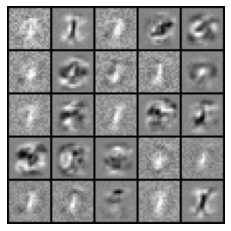

In [18]:
## ================= Part 9: Visualize Weights =================
#  You can now "visualize" what the neural network is learning by 
#  displaying the hidden units to see what features they are capturing in 
#  the data.

print ('Visualizing Neural Network... ')

displayData(Theta1[:, 1:])


In [19]:
## ================= Part 10: Implement Predict =================
#  After training the neural network, we would like to use it to predict
#  the labels. You will now implement the "predict" function to use the
#  neural network to predict the labels of the training set. This lets
#  you compute the training set accuracy.

pred = predict(Theta1, Theta2, X)

accuracy = np.mean(np.double(pred == y)) * 100
print ('Training Set Accuracy: %f\n'% accuracy)


Training Set Accuracy: 90.800000

